# Project Diabetes

The goal of this project is to predict the re entry of patients with diabetes.

In [10]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split

Load the data set and create the X (data) and Y (target).

In [11]:
#Load dataset
import pandas as pd

dataset = pd.read_csv('/Users/violaine/Desktop/machineLearningProject/dataset_diabetes/diabetic_data.csv')

#Clean the data: 69984
#For the patients that appear twice or more, just keep the first time.
#Remove the patients that have been discharged to hospice and the ones who passed away
#11-13-14-19-20-21

print("Length of dataset before removing patients seen twice")
print(len(dataset))

dataset = dataset.drop_duplicates(['patient_nbr'])
unwanted_discharge_type = [11,13,14,19,20,21]
dataset = dataset[~dataset['discharge_disposition_id'].isin(unwanted_discharge_type)]
dataset = dataset.reset_index(drop=True)

print("Length of dataset after removing patients seen twice")
print(len(dataset))

#Y0 = dataset.loc[:, ['readmitted']]
#Y0['isReadmitted'] = np.where(Y0['readmitted'] == '<30', 1,0);
#Y0.pop('readmitted')

dataset['isReadmitted'] = np.where(dataset['readmitted'] == '<30', 1,0);
dataset.pop('readmitted')

#Y = Y0.loc[:, 'isReadmitted']
Y = dataset.loc[:, 'isReadmitted']


#X = dataset.loc[:, 'encounter_id':'diabetesMed']
X = dataset.loc[:, 'encounter_id':'isReadmitted']




#Adding new colums to have binary information

X['isFemale'] = np.where(X['gender'] == 'Female', 1,0);
X['isCaucasian'] = np.where(X['race'] == 'Caucasian', 1,0);
X['isAfricanAmerican'] = np.where(X['race'] == 'AfricanAmerican', 1,0);
X['isAsian'] = np.where(X['race'] == 'Asian', 1,0);
X['isOther'] = np.where(X['race'] == 'Other', 1,0);

X['is0to10'] = np.where(X['age'] == '[0-10)', 1,0);
X['is10to20'] = np.where(X['age'] == '[10-20)', 1,0);
X['is20to30'] = np.where(X['age'] == '[20-30)', 1,0);
X['is30to40'] = np.where(X['age'] == '[30-40)', 1,0);
X['is40to50'] = np.where(X['age'] == '[40-50)', 1,0);
X['is50to60'] = np.where(X['age'] == '[50-60)', 1,0);
X['is60to70'] = np.where(X['age'] == '[60-70)', 1,0);
X['is70to80'] = np.where(X['age'] == '[70-80)', 1,0);
X['is80to90'] = np.where(X['age'] == '[80-90)', 1,0);
X['is90to100'] = np.where(X['age'] == '[90-100)', 1,0);

X['isAdmissionType1'] = np.where(X['admission_type_id'] == 1, 1,0);
X['isAdmissionType2'] = np.where(X['admission_type_id'] == 2, 1,0);
X['isAdmissionType3'] = np.where(X['admission_type_id'] == 3, 1,0);
X['isAdmissionType4'] = np.where(X['admission_type_id'] == 4, 1,0);
X['isAdmissionType5'] = np.where(X['admission_type_id'] == 5, 1,0);
X['isAdmissionType6'] = np.where(X['admission_type_id'] == 6, 1,0);

X['isDischargeDisposition1'] = np.where(X['discharge_disposition_id'] == 1, 1,0);
X['isDischargeDisposition2'] = np.where(X['discharge_disposition_id'] == 2, 1,0);
X['isDischargeDisposition3'] = np.where(X['discharge_disposition_id'] == 3, 1,0);
X['isDischargeDisposition4'] = np.where(X['discharge_disposition_id'] == 4, 1,0);
X['isDischargeDisposition5'] = np.where(X['discharge_disposition_id'] == 5, 1,0);
X['isDischargeDisposition6'] = np.where(X['discharge_disposition_id'] == 6, 1,0);
X['isDischargeDisposition7'] = np.where(X['discharge_disposition_id'] == 7, 1,0);
X['isDischargeDisposition8'] = np.where(X['discharge_disposition_id'] == 8, 1,0);
X['isDischargeDisposition9'] = np.where(X['discharge_disposition_id'] == 9, 1,0);
X['isDischargeDisposition10'] = np.where(X['discharge_disposition_id'] == 10, 1,0);
X['isDischargeDisposition12'] = np.where(X['discharge_disposition_id'] == 12, 1,0);
X['isDischargeDisposition15'] = np.where(X['discharge_disposition_id'] == 15, 1,0);
X['isDischargeDisposition16'] = np.where(X['discharge_disposition_id'] == 16, 1,0);
X['isDischargeDisposition17'] = np.where(X['discharge_disposition_id'] == 17, 1,0);
X['isDischargeDisposition18'] = np.where(X['discharge_disposition_id'] == 18, 1,0);
X['isDischargeDisposition22'] = np.where(X['discharge_disposition_id'] == 22, 1,0);
X['isDischargeDisposition23'] = np.where(X['discharge_disposition_id'] == 23, 1,0);
X['isDischargeDisposition24'] = np.where(X['discharge_disposition_id'] == 24, 1,0);
X['isDischargeDisposition25'] = np.where(X['discharge_disposition_id'] == 25, 1,0);

X['isAdmissionSource1'] = np.where(X['admission_source_id'] == 1, 1,0);
X['isAdmissionSource2'] = np.where(X['admission_source_id'] == 2, 1,0);
X['isAdmissionSource3'] = np.where(X['admission_source_id'] == 3, 1,0);
X['isAdmissionSource4'] = np.where(X['admission_source_id'] == 4, 1,0);
X['isAdmissionSource5'] = np.where(X['admission_source_id'] == 5, 1,0);
X['isAdmissionSource6'] = np.where(X['admission_source_id'] == 6, 1,0);
X['isAdmissionSource7'] = np.where(X['admission_source_id'] == 7, 1,0);
X['isAdmissionSource8'] = np.where(X['admission_source_id'] == 8, 1,0);
X['isAdmissionSource9'] = np.where(X['admission_source_id'] == 9, 1,0);
X['isAdmissionSource10'] = np.where(X['admission_source_id'] == 10, 1,0);
X['isAdmissionSource11'] = np.where(X['admission_source_id'] == 11, 1,0);
X['isAdmissionSource13'] = np.where(X['admission_source_id'] == 13, 1,0);
X['isAdmissionSource14'] = np.where(X['admission_source_id'] == 14, 1,0);
X['isAdmissionSource17'] = np.where(X['admission_source_id'] == 17, 1,0);
X['isAdmissionSource20'] = np.where(X['admission_source_id'] == 20, 1,0);
X['isAdmissionSource22'] = np.where(X['admission_source_id'] == 22, 1,0);
X['isAdmissionSource25'] = np.where(X['admission_source_id'] == 25, 1,0);

# Do not copy all the admission sources that don't exist
#X['isAdmissionSource12'] = np.where(X['admission_source_id'] == 12, 1,0);
#X['isAdmissionSource15'] = np.where(X['admission_source_id'] == 15, 1,0);
#X['isAdmissionSource16'] = np.where(X['admission_source_id'] == 16, 1,0);
#X['isAdmissionSource18'] = np.where(X['admission_source_id'] == 18, 1,0);
#X['isAdmissionSource19'] = np.where(X['admission_source_id'] == 19, 1,0);
#X['isAdmissionSource21'] = np.where(X['admission_source_id'] == 21, 1,0);
#X['isAdmissionSource23'] = np.where(X['admission_source_id'] == 23, 1,0);
#X['isAdmissionSource24'] = np.where(X['admission_source_id'] == 24, 1,0);
#X['isAdmissionSource26'] = np.where(X['admission_source_id'] == 26, 1,0);



X['isPediatricsEndocrinology'] = np.where(X['medical_specialty'] == 'Pediatrics-Endocrinology', 1,0);
X['isInternalMedicine'] = np.where(X['medical_specialty'] == 'InternalMedicine', 1,0);
X['isFamilyGeneralPractice'] = np.where(X['medical_specialty'] == 'Family/GeneralPractice', 1,0);
X['isCardiology'] = np.where(X['medical_specialty'] == 'Cardiology', 1,0);
X['isSurgeryGeneral'] = np.where(X['medical_specialty'] == 'Surgery-General', 1,0);
X['isEmergencyTrauma'] = np.where(X['medical_specialty'] == 'Emergency/Trauma', 1,0);
X['isInternalMedicine'] = np.where(X['medical_specialty'] == 'InternalMedicine', 1,0);
X['isOrthopedics'] = np.where(X['medical_specialty'] == 'Orthopedics', 1,0);

X['isChange'] = np.where(X['change'] == 'Ch',1,0);
X['isMedicated'] = np.where(X['diabetesMed'] == 'Yes',1,0);
X['isA1Measured'] = np.where(X['A1Cresult'] == 'None',0,1);
X['isMaxGlu'] = np.where(X['max_glu_serum'] == 'None',0,1);

X['isMetformin'] = np.where(X['metformin'] == 'No', 0,1);
X['isRepaglinide'] = np.where(X['repaglinide'] == 'No', 0,1);
X['isNateglinide'] = np.where(X['nateglinide'] == 'No', 0,1);
X['isChlorpropamide'] = np.where(X['chlorpropamide'] == 'No', 0,1);
X['isGlimepiride'] = np.where(X['glimepiride'] == 'No', 0,1);
X['isAcetohexamide'] = np.where(X['acetohexamide'] == 'No', 0,1);
X['isGlipizide'] = np.where(X['glipizide'] == 'No', 0,1);
X['isGlyburide'] = np.where(X['glyburide'] == 'No', 0,1);
X['isTolbutamide'] = np.where(X['tolbutamide'] == 'No', 0,1);
X['isPioglitazone'] = np.where(X['pioglitazone'] == 'No', 0,1);
X['isRosiglitazone'] = np.where(X['rosiglitazone'] == 'No', 0,1);
X['isAcarbose'] = np.where(X['acarbose'] == 'No', 0,1);
X['isMiglitol'] = np.where(X['miglitol'] == 'No', 0,1);
X['isTroglitazone'] = np.where(X['troglitazone'] == 'No', 0,1);
X['isTolazamide'] = np.where(X['tolazamide'] == 'No', 0,1);
#X['isExamide'] = np.where(X['examide'] == 'No', 0,1);
#X['isCitoglipton'] = np.where(X['citoglipton'] == 'No', 0,1);
X['isInsulin'] = np.where(X['insulin'] == 'No', 0,1);
X['isGlyburideMetformin'] = np.where(X['glyburide-metformin'] == 'No', 0,1);
X['isGlipizideMetformin'] = np.where(X['glipizide-metformin'] == 'No', 0,1);
#X['isGlimepiride-pioglitazone'] = np.where(X['glimepiride-pioglitazone'] == 'No', 0,1);
X['isGetforminRosiglitazone'] = np.where(X['metformin-rosiglitazone'] == 'No', 0,1);
X['isMetforminPioglitazone'] = np.where(X['metformin-pioglitazone'] == 'No', 0,1);


X.pop('encounter_id')
X.pop('patient_nbr')
X.pop('race')
X.pop('age')
X.pop('gender')
X.pop('weight')
X.pop('admission_type_id')
X.pop('discharge_disposition_id')
X.pop('admission_source_id')
X.pop('payer_code')
X.pop('medical_specialty')
X.pop('A1Cresult')
X.pop('diabetesMed')
X.pop('change')

#To be added in the future
X.pop('number_inpatient')
X.pop('number_outpatient')
X.pop('number_emergency')
X.pop('diag_1')
X.pop('diag_2')
X.pop('diag_3')
X.pop('max_glu_serum')
X.pop('metformin')
X.pop('repaglinide')
X.pop('nateglinide')
X.pop('chlorpropamide')
X.pop('glimepiride')
X.pop('acetohexamide')
X.pop('glipizide')
X.pop('glyburide')
X.pop('tolbutamide')
X.pop('pioglitazone')
X.pop('rosiglitazone')
X.pop('acarbose')
X.pop('miglitol')
X.pop('troglitazone')
X.pop('tolazamide')
X.pop('examide')
X.pop('citoglipton')
X.pop('insulin')
X.pop('glyburide-metformin')
X.pop('glipizide-metformin')
X.pop('glimepiride-pioglitazone')
X.pop('metformin-rosiglitazone')
X.pop('metformin-pioglitazone')

#Normalize the columns that are not binary
#X = X.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

X_stats = X.copy()
X.pop('isReadmitted')

#Treat X (to be used in scikit learn)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.reset_index(drop=True)
all_feature_names = list(X.columns.values)

#Treat X_stats (to be used in stats models) to set between 0 and 1 the non binary data

def normalize(df):
    result = df.copy()
    for feature_name in ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses']:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

X_stats = normalize(X_stats)
X_stats['intercept'] = 1.0
X_stats = X_stats.apply(pd.to_numeric, errors='coerce')
X_stats = X_stats.reset_index(drop=True)


#print ((X == 0).all())
#print (X['diag_1'])
#print (X)
#X_stats = X
#X = X.loc[:, 'encounter_id':'diabetesMed']
print (all_feature_names)

Length of dataset before removing patients seen twice
101766
Length of dataset after removing patients seen twice
69973
['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses', 'isFemale', 'isCaucasian', 'isAfricanAmerican', 'isAsian', 'isOther', 'is0to10', 'is10to20', 'is20to30', 'is30to40', 'is40to50', 'is50to60', 'is60to70', 'is70to80', 'is80to90', 'is90to100', 'isAdmissionType1', 'isAdmissionType2', 'isAdmissionType3', 'isAdmissionType4', 'isAdmissionType5', 'isAdmissionType6', 'isDischargeDisposition1', 'isDischargeDisposition2', 'isDischargeDisposition3', 'isDischargeDisposition4', 'isDischargeDisposition5', 'isDischargeDisposition6', 'isDischargeDisposition7', 'isDischargeDisposition8', 'isDischargeDisposition9', 'isDischargeDisposition10', 'isDischargeDisposition12', 'isDischargeDisposition15', 'isDischargeDisposition16', 'isDischargeDisposition17', 'isDischargeDisposition18', 'isDischargeDisposition22', 'isDischargeDisposition23', 'is

isTolazamide
isChange


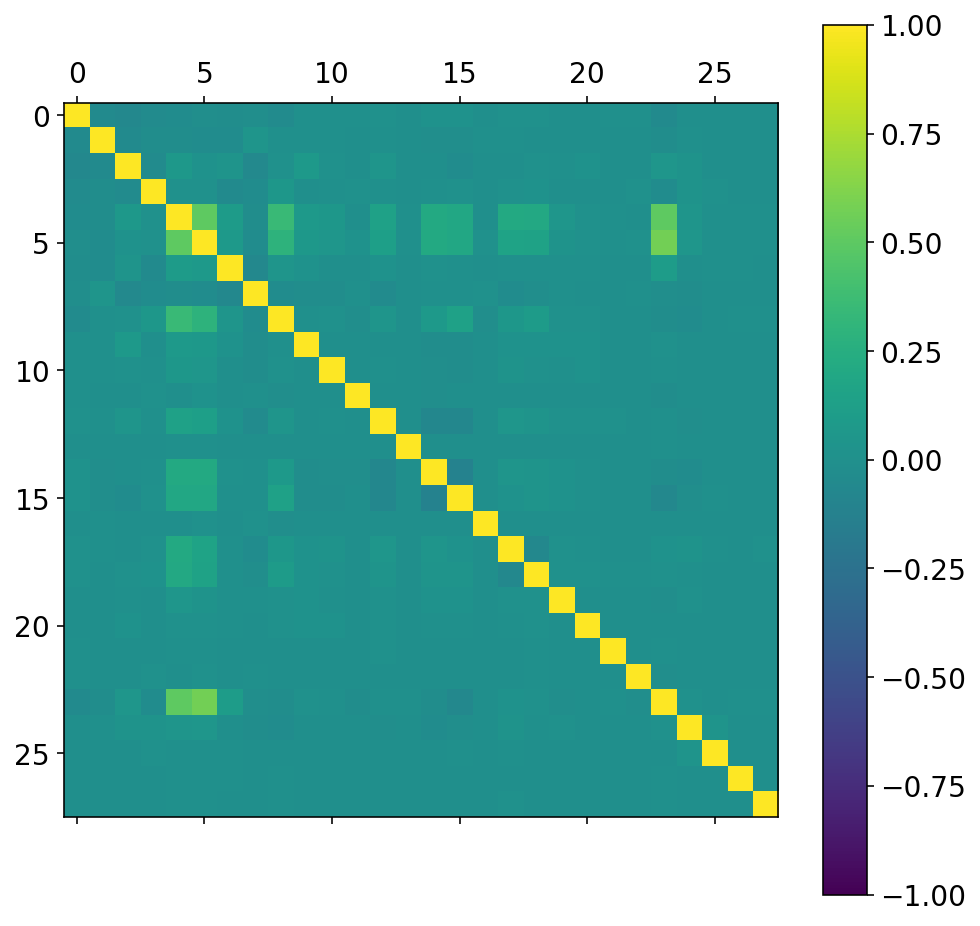

In [228]:
# Plot correlation between features

X_sample = X.reindex(columns=all_feature_names[65:])

print(all_feature_names[87])
print(all_feature_names[69])
correlations = X_sample.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

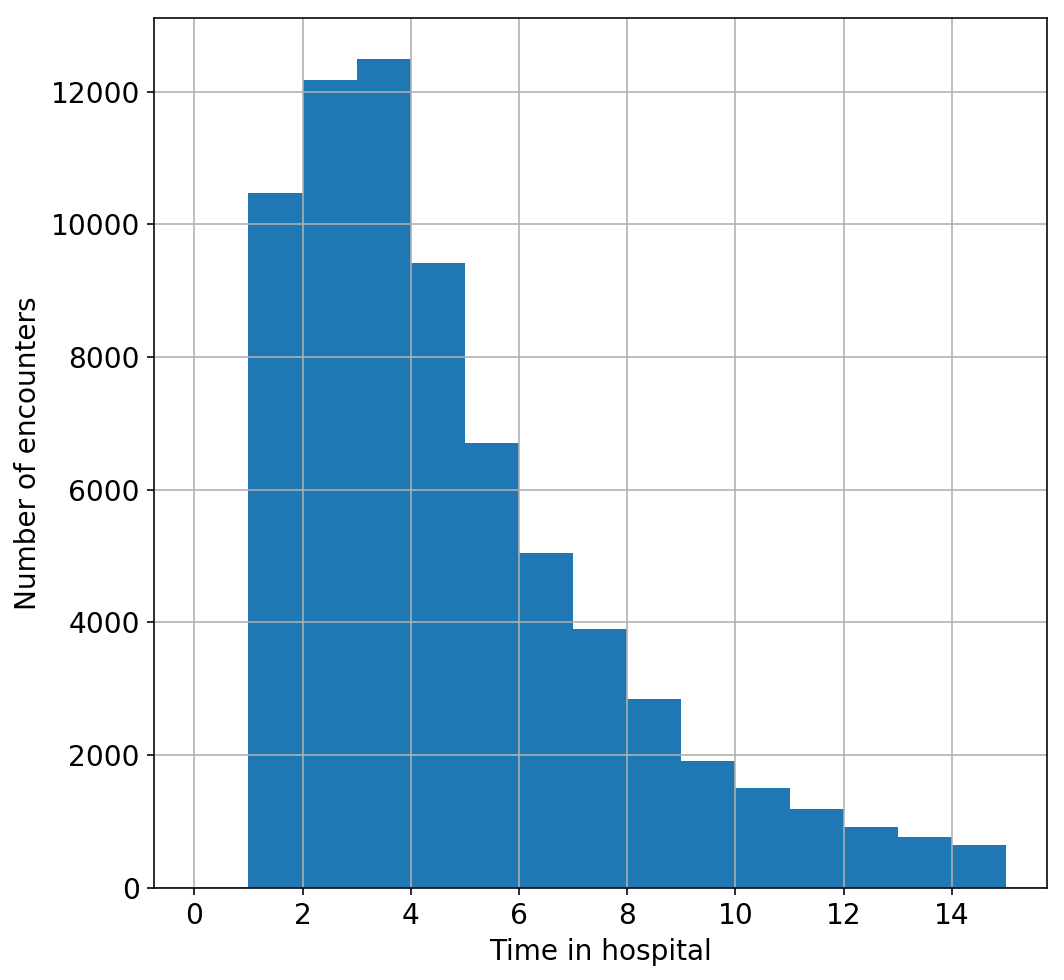

In [15]:
# Some histograms
X['time_in_hospital'].hist(bins=range(max(X['time_in_hospital'])+2))

#X['time_in_hospital'].plot(kind='barh', xlim=(0,max(X['time_in_hospital'])))
plt.xlabel("Time in hospital")
plt.ylabel("Number of encounters")
plt.savefig('num_time_in_hospital.pdf')


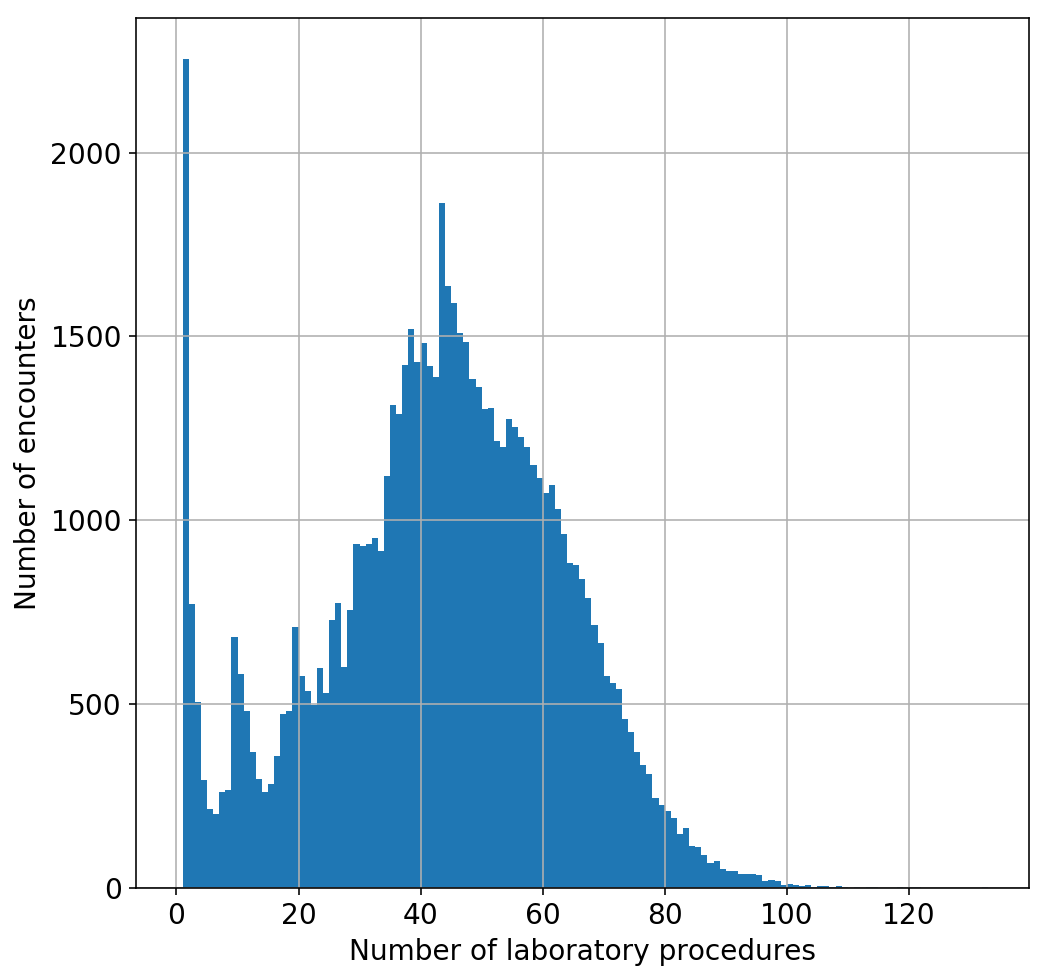

In [16]:
# Some histograms
X['num_lab_procedures'].hist(bins=range(max(X['num_lab_procedures'])+2))

#X['time_in_hospital'].plot(kind='barh', xlim=(0,max(X['time_in_hospital'])))
plt.xlabel("Number of laboratory procedures")
plt.ylabel("Number of encounters")
plt.savefig('num_lab_procedures.pdf')

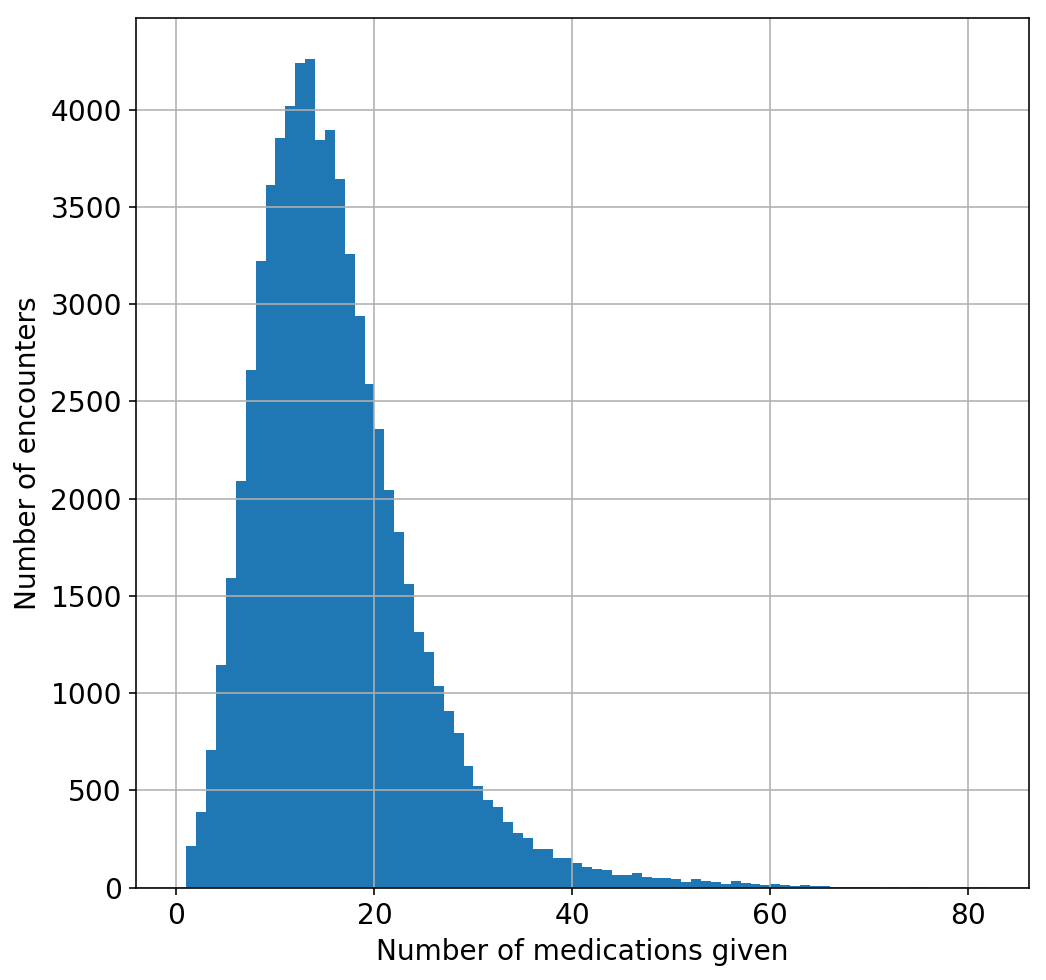

In [18]:
# Some histograms
X['num_medications'].hist(bins=range(max(X['num_medications'])+2))

#X['time_in_hospital'].plot(kind='barh', xlim=(0,max(X['time_in_hospital'])))
plt.xlabel("Number of medications given")
plt.ylabel("Number of encounters")
plt.savefig('num_medications.pdf')

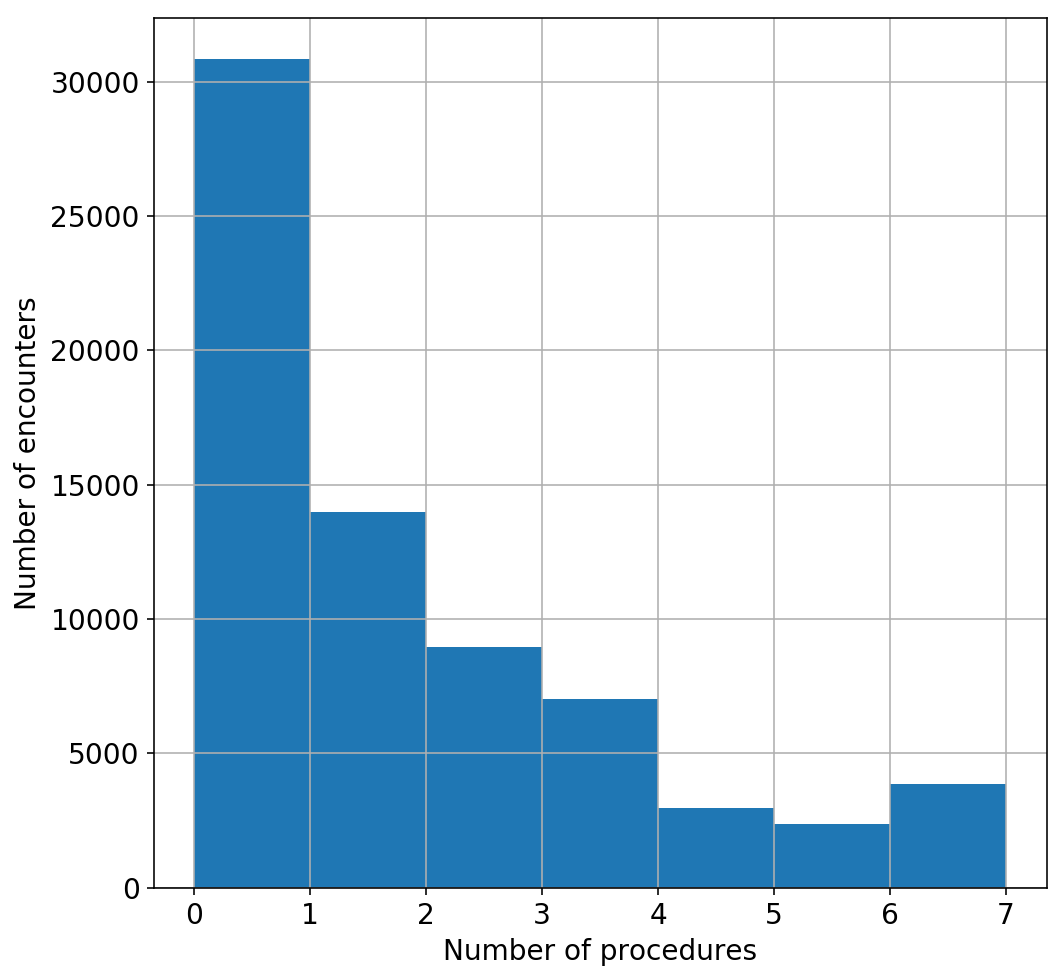

In [19]:
# Some histograms
X['num_procedures'].hist(bins=range(max(X['num_procedures'])+2))

#X['time_in_hospital'].plot(kind='barh', xlim=(0,max(X['time_in_hospital'])))
plt.xlabel("Number of procedures")
plt.ylabel("Number of encounters")
plt.savefig('num_procedures.pdf')

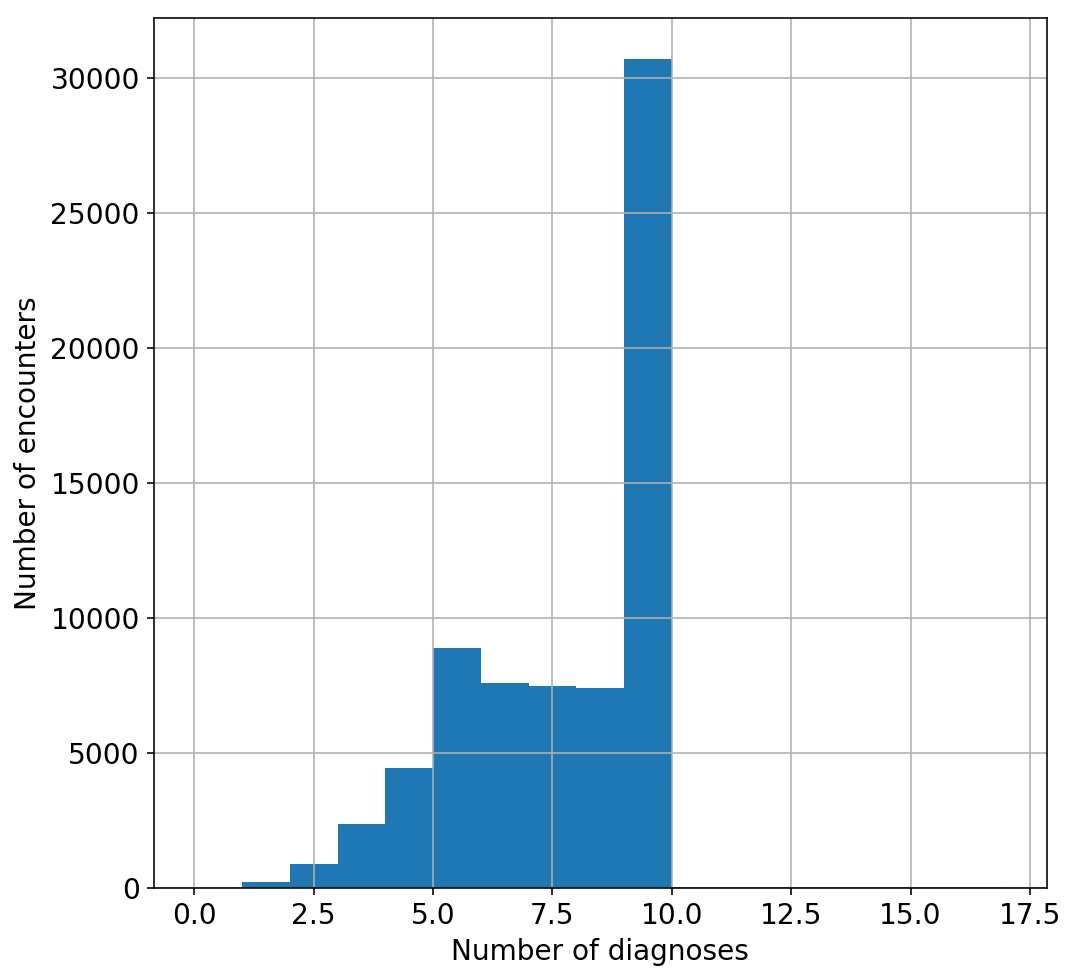

In [20]:
# Some histograms
X['number_diagnoses'].hist(bins=range(max(X['number_diagnoses'])+2))

#X['time_in_hospital'].plot(kind='barh', xlim=(0,max(X['time_in_hospital'])))
plt.xlabel("Number of diagnoses")
plt.ylabel("Number of encounters")
plt.savefig('num_diagnoses.pdf')

[[  4.90691460e+00   2.79468043e+01   2.16125118e+00 ...,   1.43685354e-04
   -1.66185379e-06   5.37299881e-05]
 [  3.76777279e+00   3.59933706e+01   1.30601224e+00 ...,   1.02407177e-04
    1.94003880e-05   2.54464723e-05]
 [  7.93286262e+00   2.88806215e+01   3.88296424e+00 ...,   2.13668714e-04
   -3.55724970e-05   9.14998503e-05]
 ..., 
 [  3.90415706e+00   5.99979801e+01   7.92727611e-01 ...,   6.29544879e-05
    4.15440502e-05  -1.29824756e-05]
 [  2.59477934e+00   3.90075554e+01   5.55346765e-01 ...,   6.92754199e-05
    3.58809286e-05   5.15091941e-06]
 [  6.50746185e+00   5.01237162e+01   2.53726103e+00 ...,   1.42148634e-04
    1.82158105e-06   3.73943828e-05]]


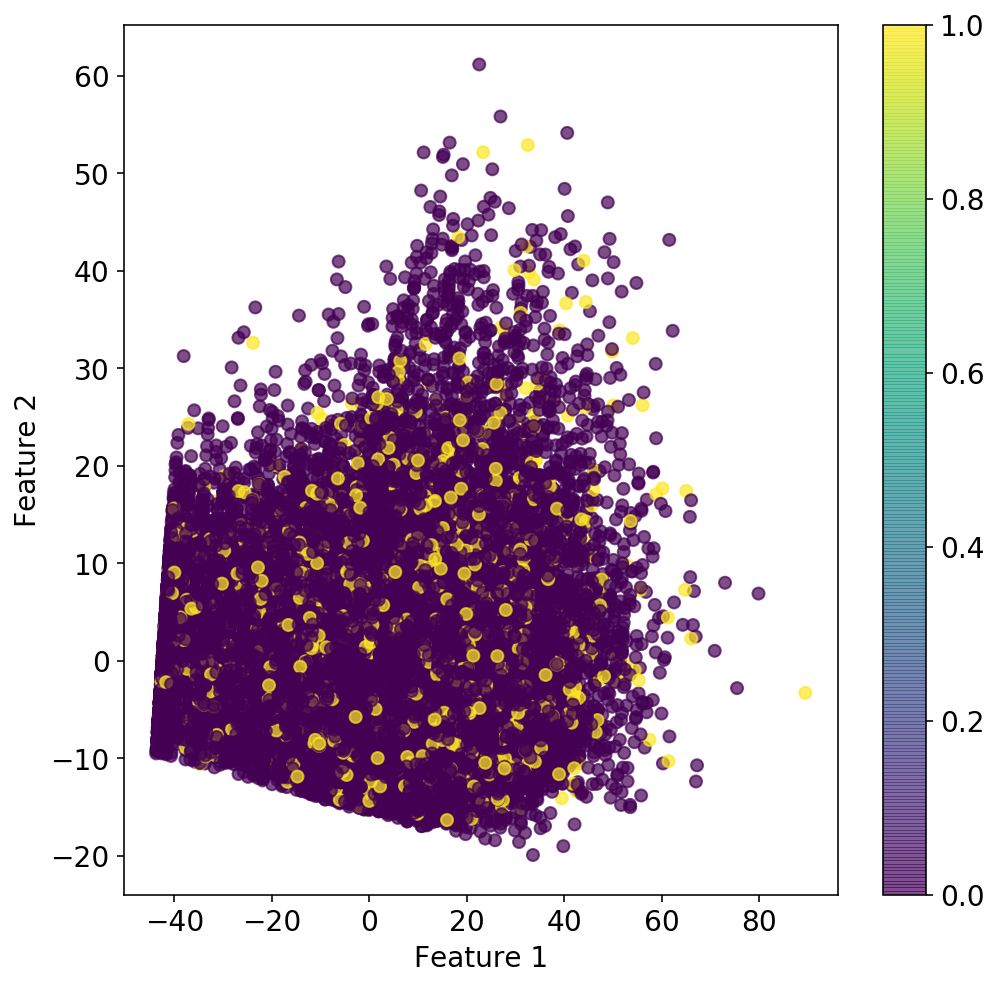

In [22]:
# Here cell for PCA
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

#Split the data in train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=4)

pca = PCA(2)
pca.fit(X_train)

X_pca = pca.transform(X_train)
X_new = pca.inverse_transform(X_pca)
print (X_new)

X_pca_test = pca.transform(X_test)
X_new_test = pca.inverse_transform(X_pca_test)


plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train,
            alpha=0.7)#, lw=0
plt.colorbar();
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.savefig('PCA.pdf')

First step is to build a simple random forest classifier and sort features by importance. We need a classifier with 3 classes: No (no readmission), < 30 (readmission after less than 30 days) and > 30 (readmission after more than 30 days).

Score for the random forest classifier
0.912966844512
average correlation: 0.0440154500917


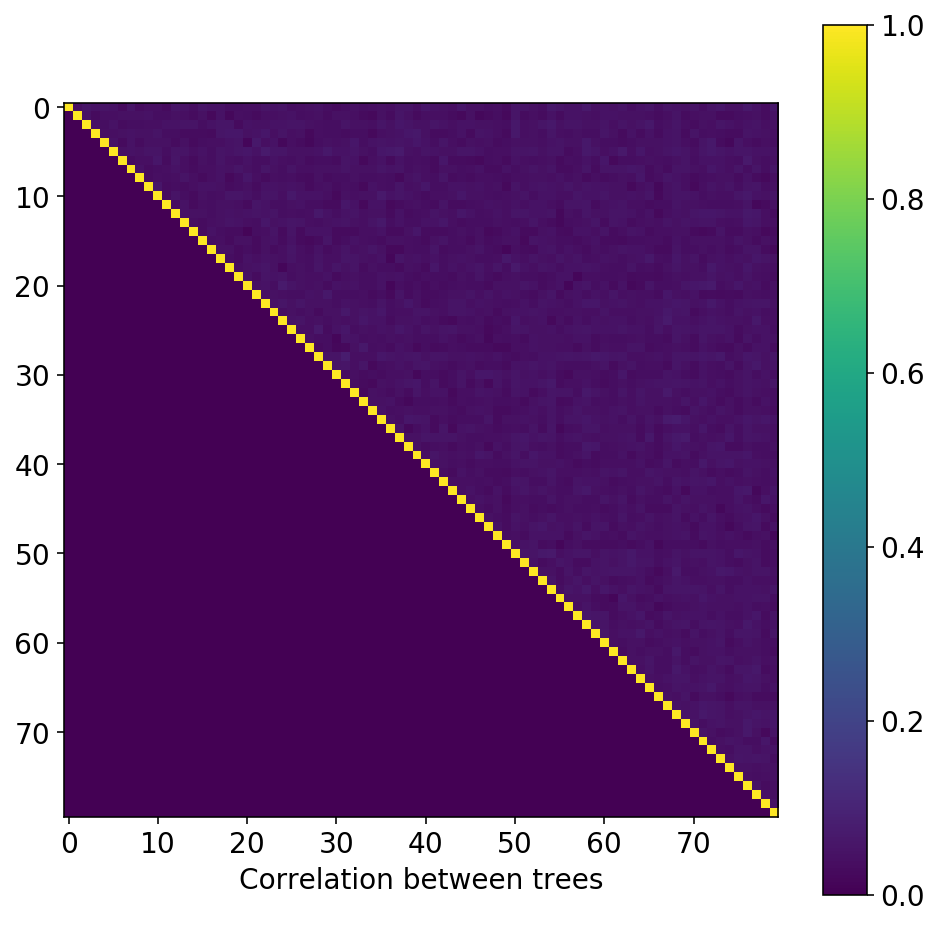

In [23]:
# Import classifiers and train_test_split
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              BaggingClassifier, GradientBoostingRegressor)

clf = RandomForestClassifier(n_estimators = 80, max_features='auto', bootstrap=True)

clf.fit(X_train,y_train)
print("Score for the random forest classifier")
print (clf.score(X_test,y_test))
feature_importance_clf = clf.feature_importances_

# Try to estimate and plot the avergae correlation:

average = 0.
N = 0
corr = np.zeros((80, 80))
for i in range(80):
    for j in range(i, 80):
        rgr1 = clf.estimators_[i]
        rgr2 = clf.estimators_[j]
        corr[i,j] = np.corrcoef(rgr1.predict_proba(X_test)[:,0], rgr2.predict_proba(X_test)[:,0])[0, 1]
        if j > i:
            average += corr[i,j]
            N += 1
        
print('average correlation:', average/ N)
plt.imshow(corr, interpolation='none')
plt.colorbar();
plt.xlabel("Correlation between trees")
plt.savefig('Correlation_trees.pdf')

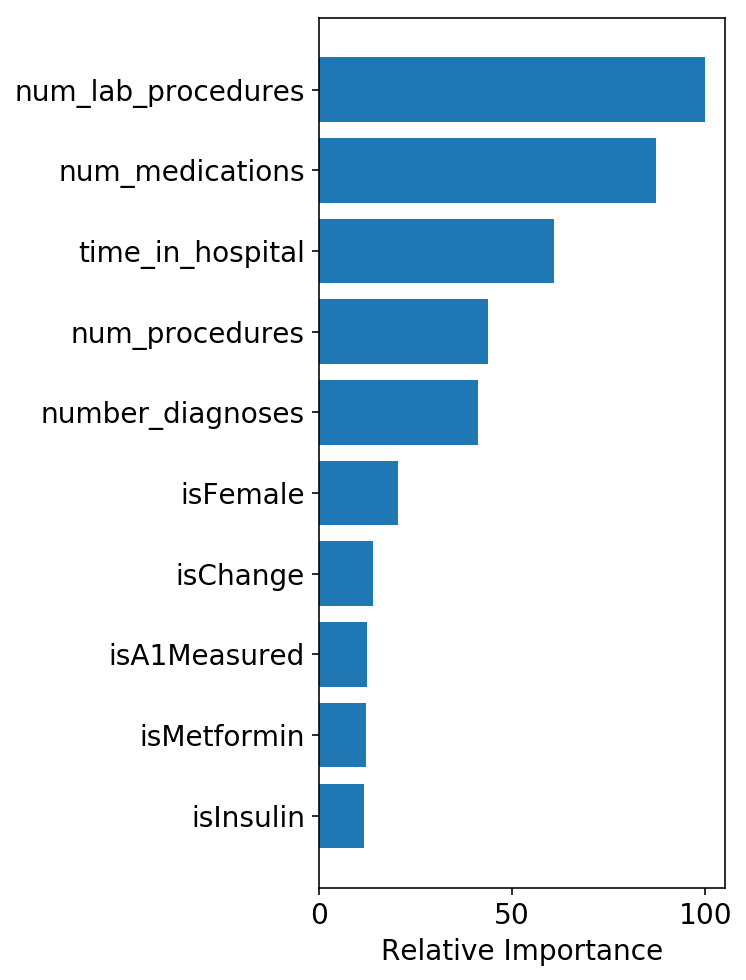

In [33]:
#Now feature importance for the random forest classifier
feature_importance_clf = 100.0 * (feature_importance_clf / feature_importance_clf.max())
sorted_idx = np.argsort(feature_importance_clf)[83:]
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure()
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance_clf[sorted_idx], align='center')
plt.yticks(pos, X.columns.values[sorted_idx])
plt.xlabel('Relative Importance')
#plt.title('Feature importance')
plt.show()
fig.savefig('feature_importance.pdf')

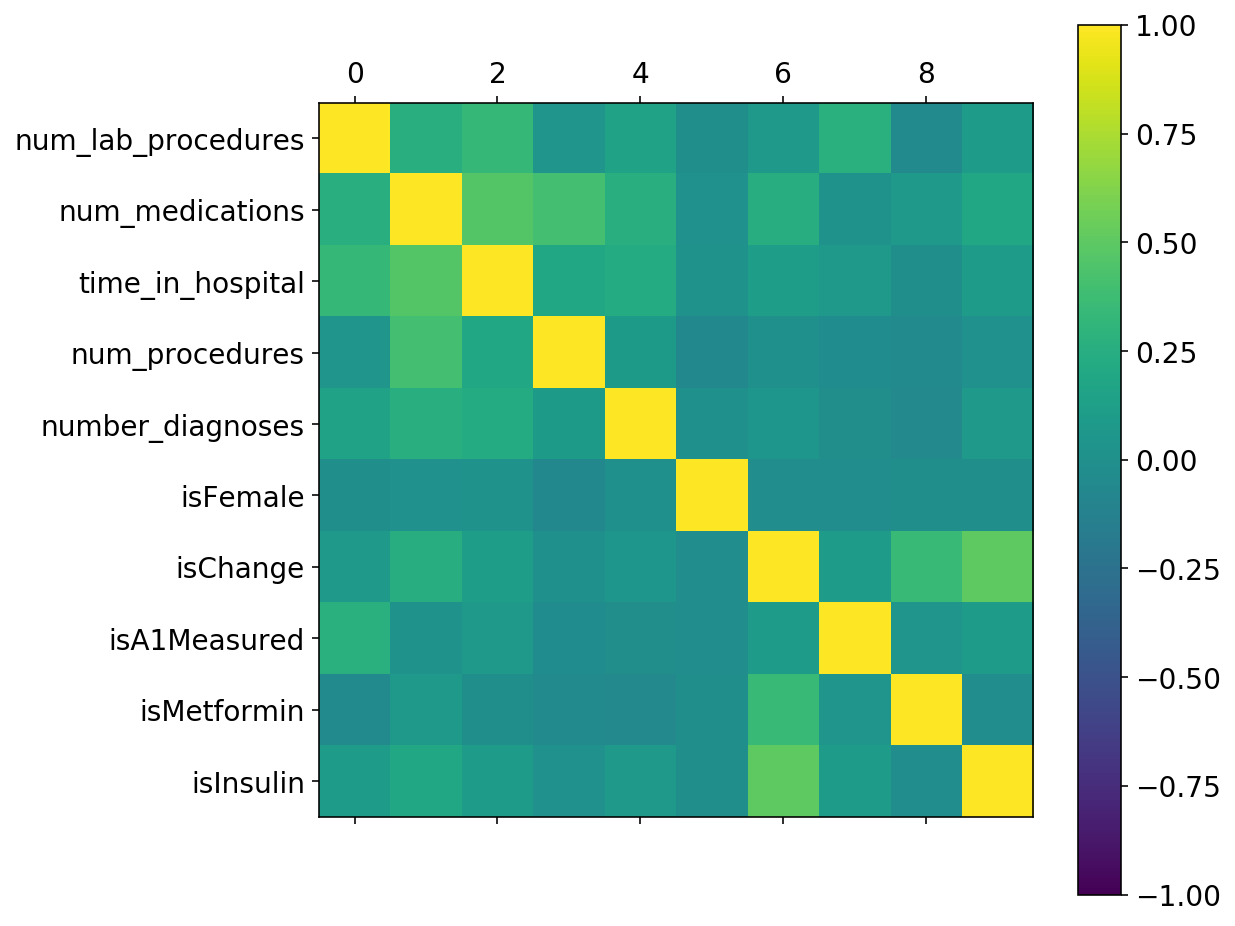

In [31]:
# Plot correlation between features

X_sample = X.reindex(columns=['num_lab_procedures', 'num_medications',
                              'time_in_hospital','num_procedures',
                              'number_diagnoses','isFemale','isChange','isA1Measured',
                              'isMetformin','isInsulin'])


correlations = X_sample.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ks = np.arange(10)
labels = ['num_lab_procedures', 'num_medications',
                              'time_in_hospital','num_procedures',
                              'number_diagnoses','isFemale','isChange','isA1Measured',
                              'isMetformin','isInsulin']
plt.yticks(ks, labels)
plt.show()
#plt.xlabel("Number of procedures")
#plt.ylabel("Proportion of readmission [%]")

fig.savefig('main_correlations.pdf')

In [36]:
#Try to make a logistic regression work (i.e. decent score)
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C=1., solver='liblinear')
X_train = X_train[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_diagnoses','isFemale','isA1Measured','isChange','isInsulin','isMetformin','is0to10','is10to20','is20to30','is40to50','is50to60','is60to70','is70to80','is80to90','is90to100']]
X_test = X_test[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_diagnoses','isFemale','isA1Measured','isChange','isInsulin','isMetformin','is0to10','is10to20','is20to30','is40to50','is50to60','is60to70','is70to80','is80to90','is90to100']]
log.fit(X_train, y_train)
print ("Score of the logistic regression:")
print (log.score(X_test,y_test))



Score of the logistic regression:
0.913157393293


In [37]:
#Try to get a good summary of the logistic regression
import statsmodels.api as sm
from patsy import dmatrices

#ref: isCaucasian, is30to40, isAdmissionType1 (Emergency), isDischargeDisposition1 (home), isAdmissionSource7 (emergency), isCardiology
#y_log, X_log = dmatrices( 'isReadmitted ~ intercept + time_in_hospital + num_lab_procedures + num_procedures + num_medications + number_diagnoses + isFemale + isAfricanAmerican + isAsian + isOther + is0to10 + is10to20 + is20to30 + is40to50 + is50to60 + is60to70 + is70to80 + is80to90 + is90to100  + isAdmissionType2 + isAdmissionType3 + isAdmissionType4 + isAdmissionType5 + isAdmissionType6  + isDischargeDisposition2 + isDischargeDisposition3 + isDischargeDisposition4 + isDischargeDisposition5 + isDischargeDisposition6 + isDischargeDisposition7 + isDischargeDisposition8 + isDischargeDisposition9 + isDischargeDisposition10 + isDischargeDisposition12 + isDischargeDisposition15 + isDischargeDisposition16 + isDischargeDisposition17 + isDischargeDisposition18 + isDischargeDisposition22 + isDischargeDisposition23 + isDischargeDisposition24 + isDischargeDisposition25 + isPediatricsEndocrinology + isInternalMedicine + isFamilyGeneralPractice  + isSurgeryGeneral + isEmergencyTrauma + isOrthopedics + isChange + isMedicated + isMaxGlu + isA1Measured + isMetformin + isRepaglinide + isNateglinide + isChlorpropamide + isGlimepiride + isAcetohexamide + isGlipizide + isGlyburide + isTolbutamide + isPioglitazone + isRosiglitazone + isAcarbose + isMiglitol + isTroglitazone + isTolazamide + isInsulin + isGlyburideMetformin + isGlipizideMetformin + isGetforminRosiglitazone + isMetforminPioglitazone', data=X_stats, return_type='dataframe')
# Using only reduced data
y_log, X_log = dmatrices( 'isReadmitted ~ time_in_hospital + num_lab_procedures + num_procedures + num_medications + number_diagnoses + isFemale + isA1Measured + isChange + isInsulin + isMetformin + is0to10 + is10to20 + is20to30 + is40to50 + is50to60 + is60to70 + is70to80 + is80to90 + is90to100', data=X_stats, return_type='dataframe')
mod = sm.Logit(y_log,X_log)
res = mod.fit()#
print (res.summary())

#Transform into probabilities
#print (np.exp(res.params))

params = res.params
conf = res.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))
#I have an error (hessian matrix singular... Probably needs to build dmatrices from patsy)

Optimization terminated successfully.
         Current function value: 0.298439
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           isReadmitted   No. Observations:                69973
Model:                          Logit   Df Residuals:                    69953
Method:                           MLE   Df Model:                           19
Date:                Mon, 05 Jun 2017   Pseudo R-squ.:                 0.01133
Time:                        10:15:10   Log-Likelihood:                -20883.
converged:                       True   LL-Null:                       -21122.
                                        LLR p-value:                 1.865e-89
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             -3.0925      0.092    -33.792      0.000        -3.272    -2.913
time_

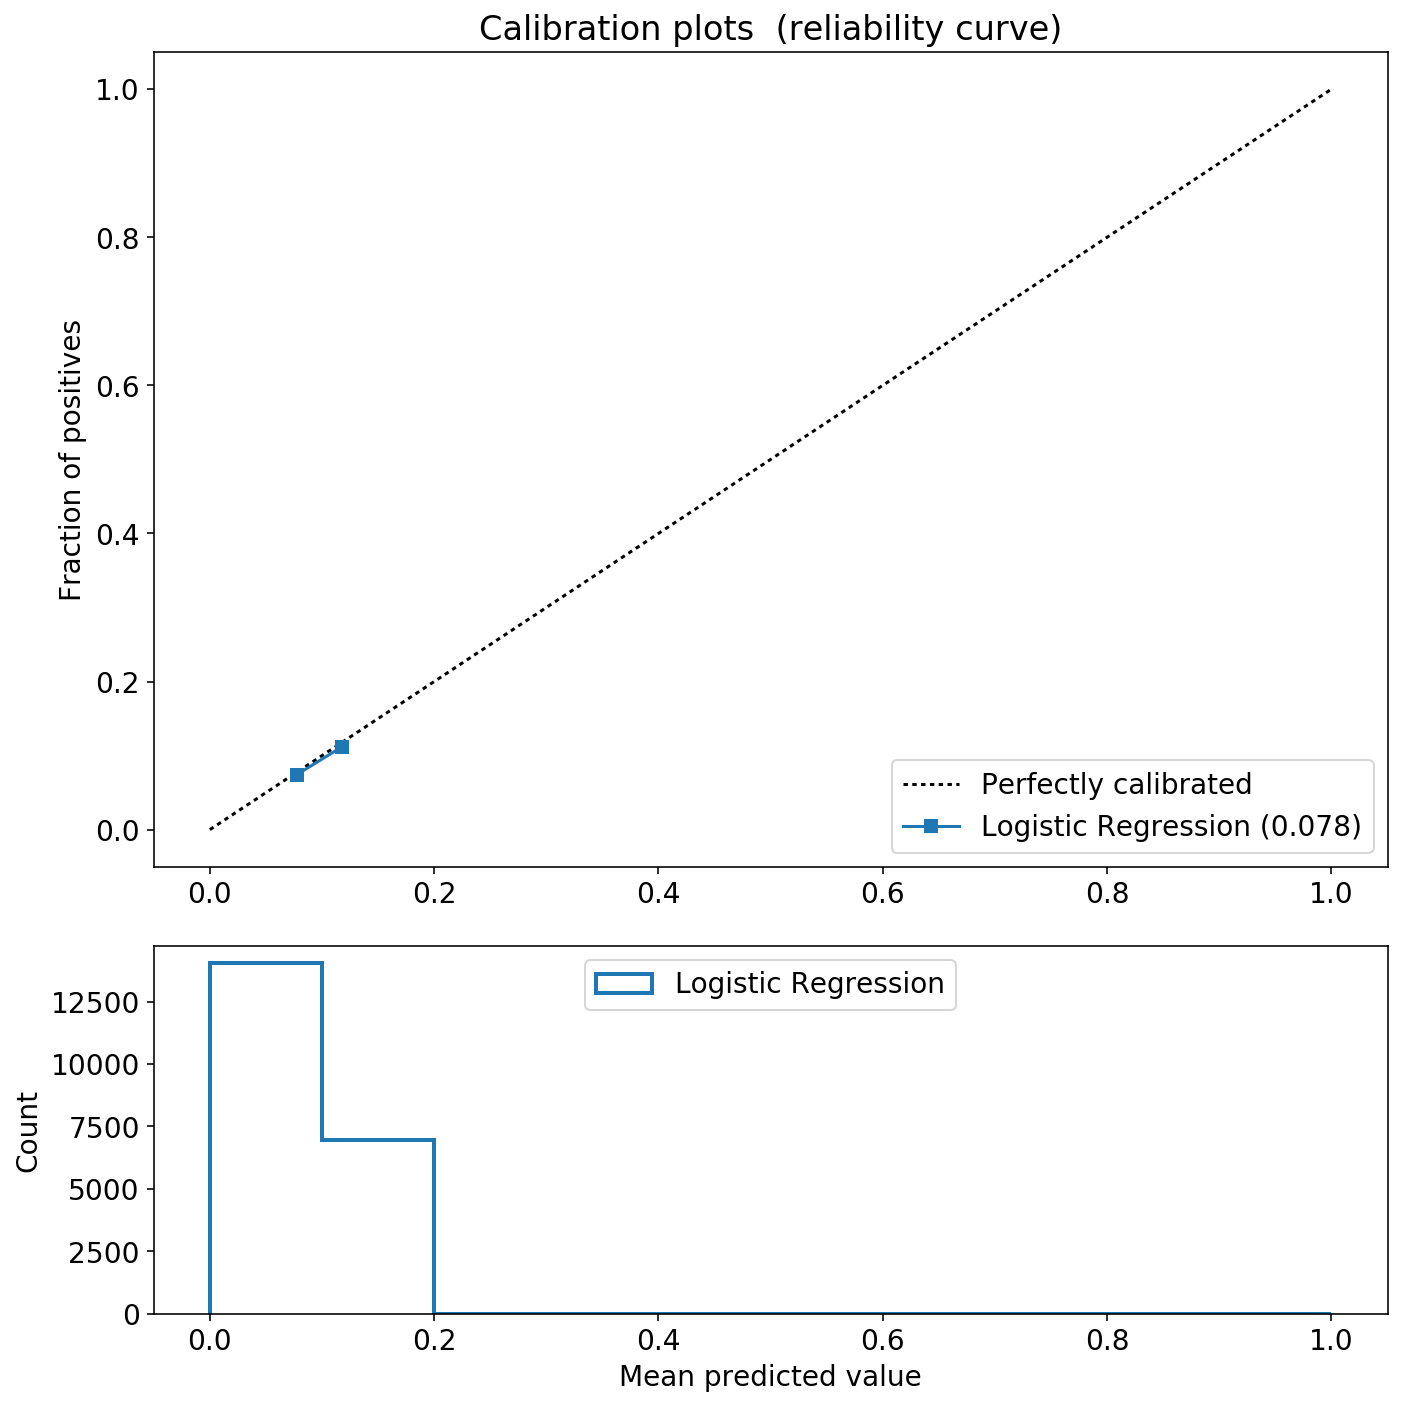

In [302]:
#Try a logistic regression (with calibration)


from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

fig = plt.figure(1, figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
#clf = LogisticRegression(C=1., solver='lbfgs')
name = 'Logistic Regression'

#clf.fit(X_train, y_train)
y_pred = log.predict(X_test)
#print (y_pred)
#print ((y_pred == 0).all())

if hasattr(log, "predict_proba"):
    prob_pos = log.predict_proba(X_test)[:, 1]
else:  # use decision function
    prob_pos = log.decision_function(X_test)
    prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                label="%s (%1.3f)" % (name, clf_score))

ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()

In [383]:
probas = log.predict_proba(X[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_diagnoses','isFemale','isA1Measured','isChange','isInternalMedicine','isMetformin','is0to10','is10to20','is20to30','is40to50','is50to60','is60to70','is70to80','is80to90','is90to100']])
print (probas)
print (log.classes_)

[[ 0.97296315  0.02703685]
 [ 0.92309827  0.07690173]
 [ 0.9431534   0.0568466 ]
 ..., 
 [ 0.91840805  0.08159195]
 [ 0.86626271  0.13373729]
 [ 0.89934737  0.10065263]]
[0 1]


10
['is0to10', 'is10to20', 'is20to30', 'is30to40', 'is40to50', 'is50to60', 'is60to70', 'is70to80', 'is80to90', 'is90to100']
The average probability is
9.09868697833


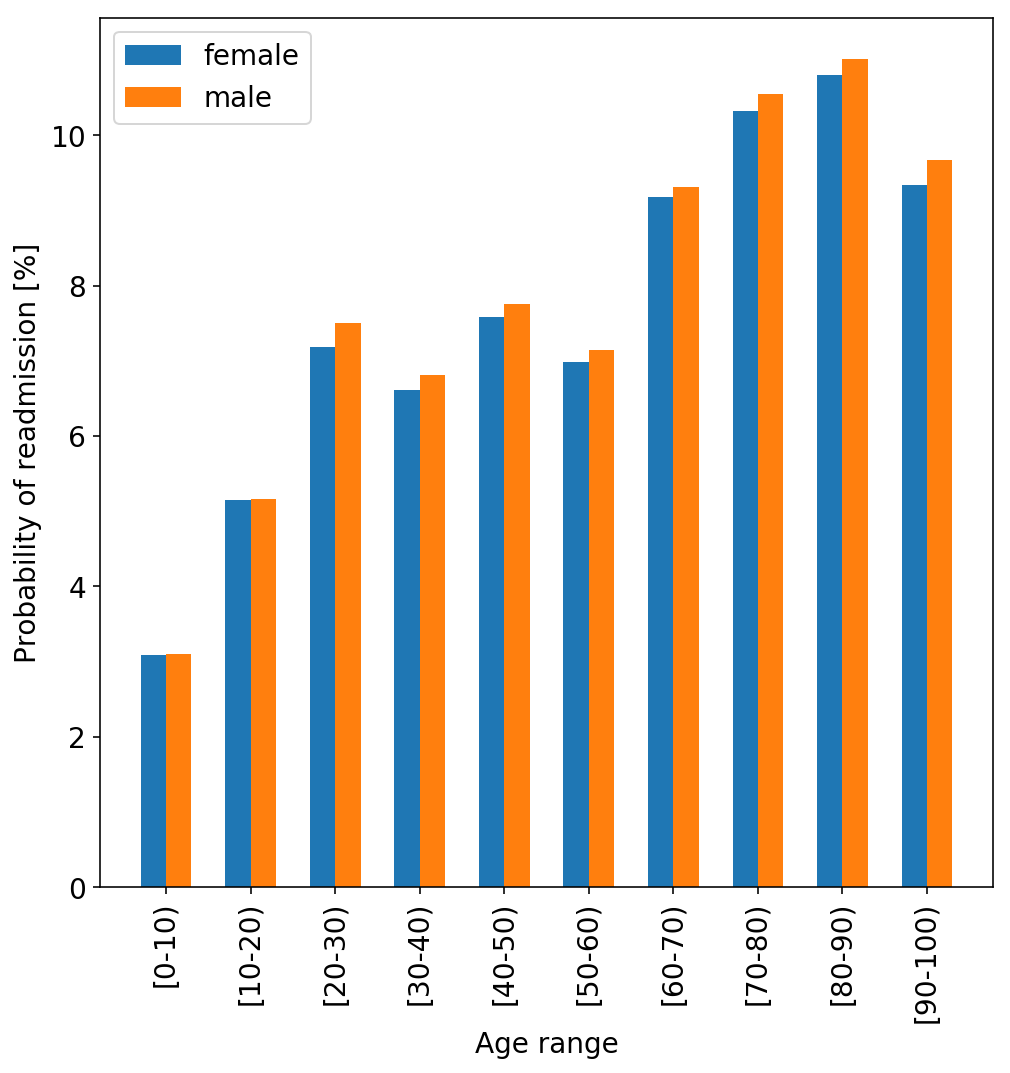

In [390]:
#Vizualisation
# Try to plot things, for example the number of entry as a function of gender
features = ['is0to10','is10to20','is20to30','is30to40','is40to50','is50to60','is60to70','is70to80','is80to90','is90to100']
probas_female = [0]*(len(features))
probas_male = [0]*(len(features))
num_tot_feature_female = [0]*(len(features))
num_tot_feature_male = [0]*(len(features))
#ks = range(0,10*len(features))
#ks = [0,10,20,30,40,50,60,70,80,90]
labels = ['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)',
          '[60-70)','[70-80)','[80-90)','[90-100)']
#print(len(ks))
print(len(features))

print(features)

len(X.index)
average_proba = 0

for b in range(0,len(X.index) -1):
#    average_proba += Y[b]
    average_proba += probas[b,1]
    for a in range(0,len(features)):
        if (X[features[a]].iloc[b] == 1):
            if (X['isFemale'].iloc[b] == 1):
                probas_female[a] += probas[b,1]
                num_tot_feature_female[a] += 1
            if (X['isFemale'].iloc[b] == 0):
                probas_male[a] += probas[b,1]
                num_tot_feature_male[a] += 1
            

pc_female = []
pc_male = []
for a in range(0,len(features)):          
    pc_female.append(100*probas_female[a]/num_tot_feature_female[a])
    pc_male.append(100*probas_male[a]/num_tot_feature_male[a])
    
print("The average probability is")    
print(100*average_proba/(len(X.index -1)))

#shift = [5]*(len(features))

ks = np.arange(10)  # the x locations for the groups
shift = 0.15       # the width of the bars

plt.bar(ks - shift, pc_female, width = 0.3, label = 'female')
plt.bar(ks + shift, pc_male, width = 0.3, label = 'male')
#plt.errorbar(ks, probas, '-b', label='Admission', lw=4)
plt.legend(loc='best')
plt.xlabel("Age range")
plt.xticks(ks, labels, rotation='vertical')
plt.ylabel("Probability of readmission [%]")
plt.savefig('prob_age.pdf')

The average probability is
9.09868697833


/Users/violaine/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


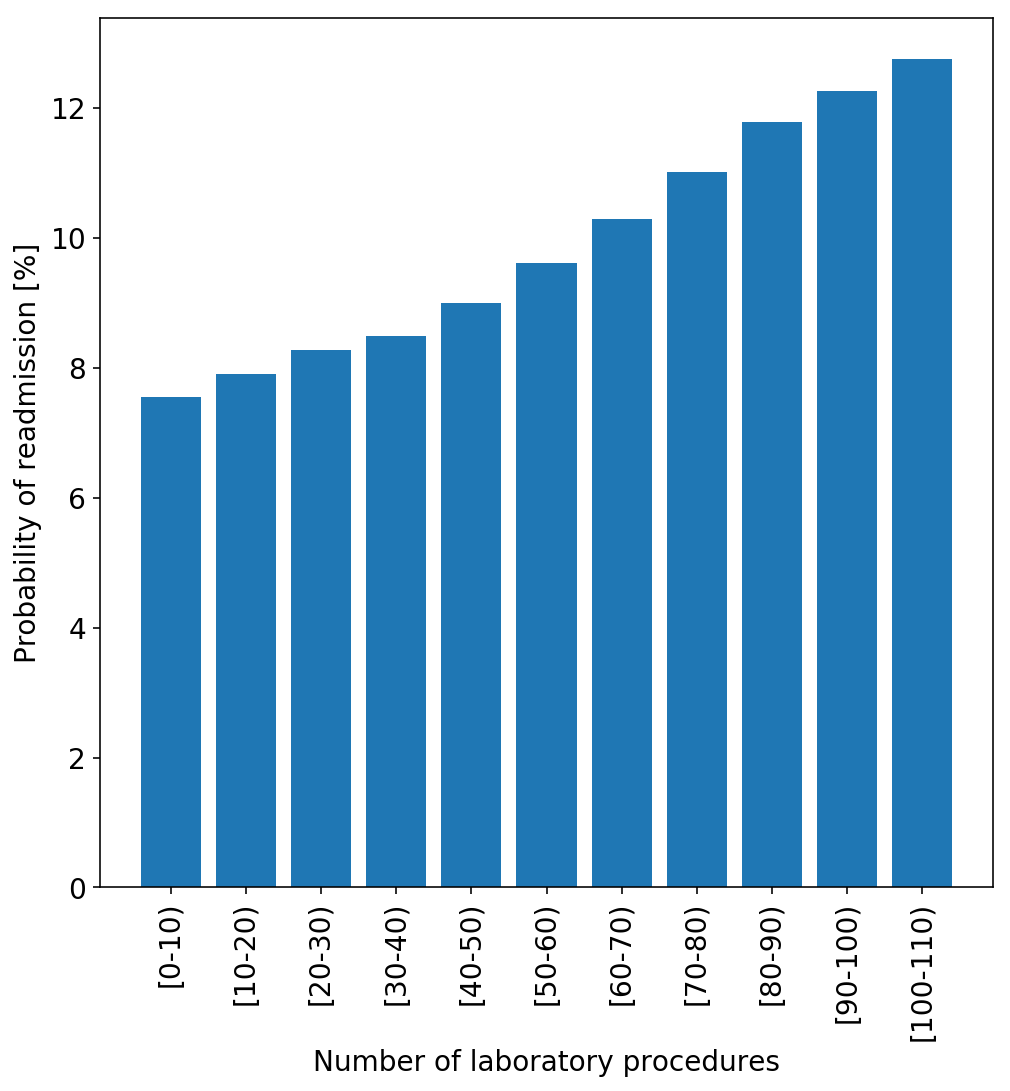

In [391]:
#Vizualisation
# Plot laboratory procedures
features = [0,10,20,30,40,50,60,70,80,90,100]
labels = ['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)',
          '[60-70)','[70-80)','[80-90)','[90-100)', '[100-110)']
prob = [0]*(len(features))
num_tot_feature = [0]*(len(features))
ks = np.arange(len(features))

len(X.index)
average_proba = 0

for b in range(0,len(X.index) -1):
    average_proba += probas[b,1]
    for a in range(0,len(features)):
        if ((X['num_lab_procedures'].iloc[b] >= features[a]) and (X['num_lab_procedures'].iloc[b] <= (features[a]+10))):
            prob[a] += probas[b,1]
            num_tot_feature[a] += 1
            
pc = []
for a in range(0,len(features)):          
    pc.append(100*prob[a]/num_tot_feature[a])
    
print("The average probability is")    
print(100*average_proba/(len(X.index -1)))
 
plt.bar(ks, pc)
#plt.errorbar(ks, probas, '-b', label='Admission', lw=4)
plt.legend(loc='best')
plt.xlabel("Number of laboratory procedures")
plt.xticks(ks, labels, rotation='vertical')
plt.ylabel("Probability of readmission [%]")
plt.savefig('prob_num_lab_procedures.pdf')

0
[287.51899756766466, 1363.6706691820591, 2124.1985648844484, 1769.3482224415532, 1033.3699948357335, 534.80940325884319, 248.99285952368814, 122.49297125026689, 62.148806903327859, 39.088022717134152, 23.651550552900293]
[4053, 17034, 24107, 18676, 10314, 5090, 2257, 1080, 553, 339, 204]
The average probability is
9.09868697833


/Users/violaine/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


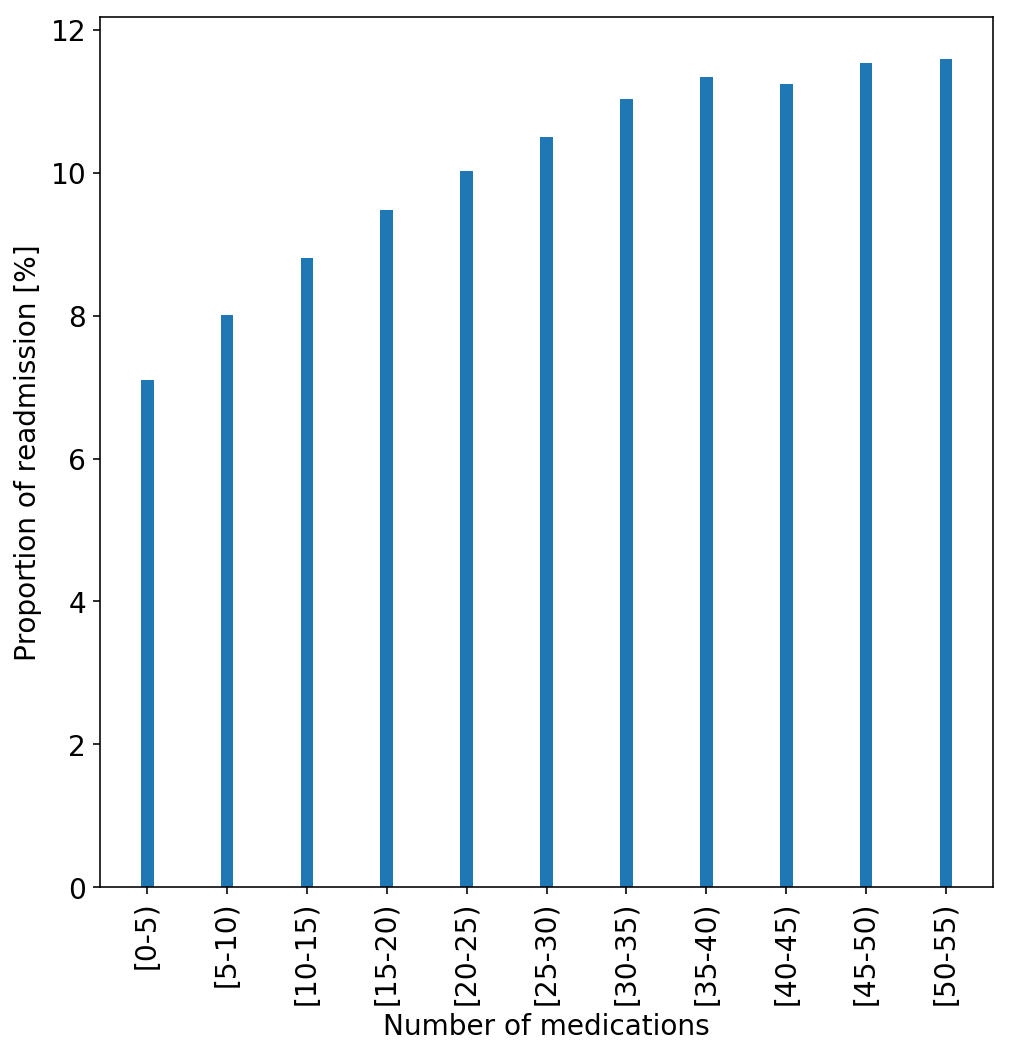

In [392]:
#Vizualisation
# Try to plot things, for example the number of entry as a function of gender
features = [0,5,10,15,20,25,30,35,40,45,50]
labels = ['[0-5)','[5-10)','[10-15)','[15-20)','[20-25)','[25-30)',
          '[30-35)','[35-40)','[40-45)','[45-50)', '[50-55)']
prob = [0]*(len(features))
num_tot_feature = [0]*(len(features))
ks = np.arange(len(features))

len(X.index)

average_proba = 0
print (average_proba)

for b in range(0,len(X.index) -1):
    average_proba += probas[b,1]
    for a in range(0,len(features)):
        if ((X['num_medications'].iloc[b] >= features[a]) and (X['num_medications'].iloc[b] <= (features[a]+5))):
            prob[a] += probas[b,1]
            num_tot_feature[a] += 1

            
print(prob)
print(num_tot_feature)
            
pc = []
for a in range(0,len(features)):          
    pc.append(100*prob[a]/num_tot_feature[a])
    
print("The average probability is")    
print(100*average_proba/(len(X.index -1)))
 
plt.bar(features, pc)
#plt.errorbar(ks, probas, '-b', label='Admission', lw=4)
plt.legend(loc='best')
plt.xlabel("Number of medications")
plt.xticks(features, labels, rotation='vertical')
plt.ylabel("Proportion of readmission [%]")
plt.savefig('prob_num_medications.pdf')

The average probability is
9.09868697833


/Users/violaine/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


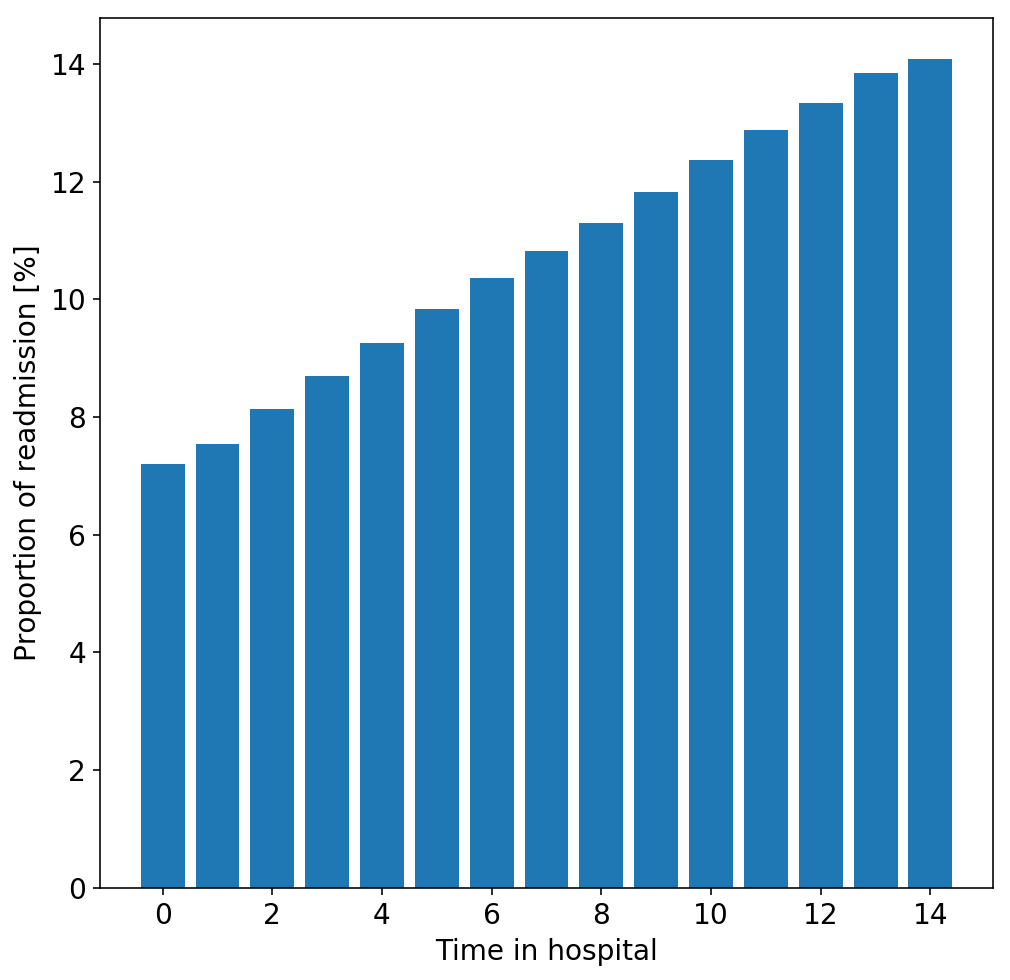

In [393]:
features = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
prob = [0]*(len(features))
num_tot_feature = [0]*(len(features))
ks = range(0,len(features))

len(X.index)
average_proba = 0

for b in range(0,len(X.index) -1):
    average_proba += probas[b,1]
    for a in range(0,len(features)):
        if ((X['time_in_hospital'].iloc[b] >= features[a]) and (X['time_in_hospital'].iloc[b] <= (features[a]+1))):
            prob[a] += probas[b,1]
            num_tot_feature[a] += 1
            
pc = []
for a in range(0,len(features)):          
    pc.append(100*prob[a]/num_tot_feature[a])
        
print("The average probability is")    
print(100*average_proba/(len(X.index -1)))
 
plt.bar(features, pc)
plt.legend(loc='best')
plt.xlabel("Time in hospital")
plt.ylabel("Proportion of readmission [%]")
plt.savefig('prob_time_in_hospital.pdf')

The average probability is
9.09868697833


/Users/violaine/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


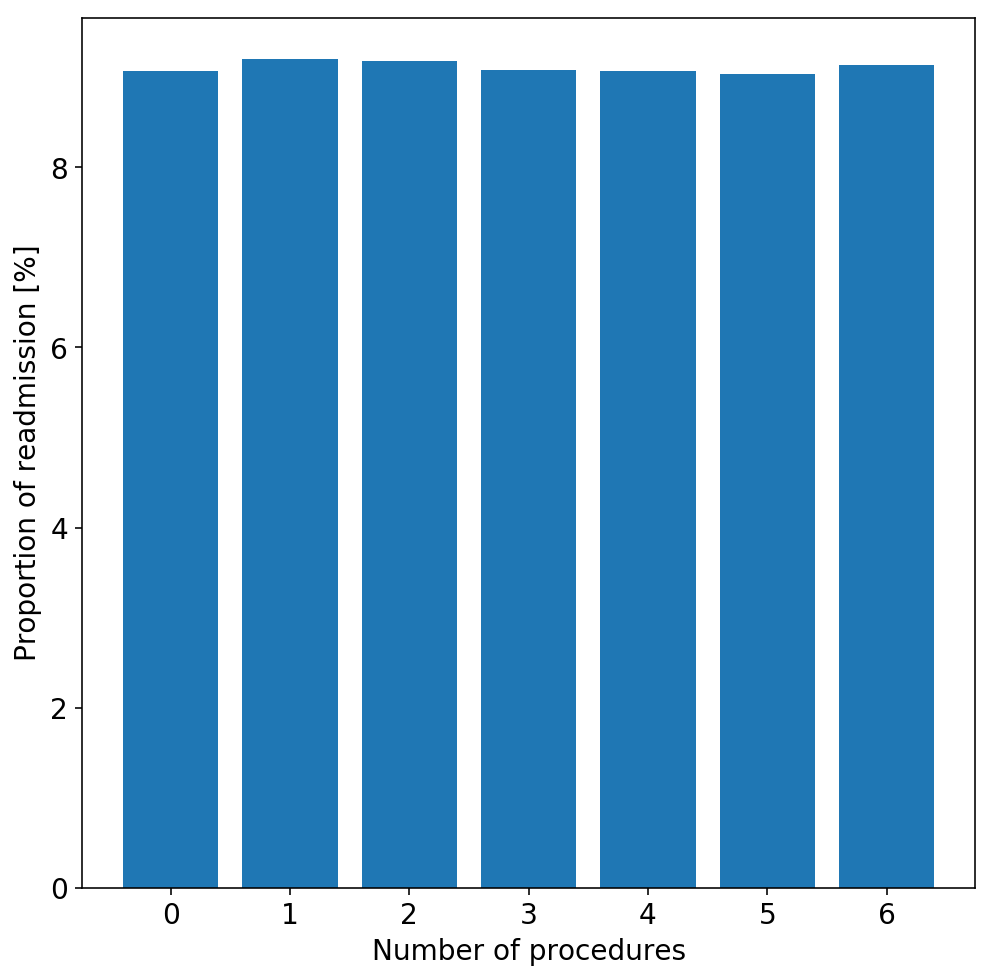

In [394]:
features = [0,1,2,3,4,5,6]
prob = [0]*(len(features))
num_tot_feature = [0]*(len(features))

len(X.index)
average_proba = 0

for b in range(0,len(X.index) -1):
    average_proba += probas[b,1]
    for a in range(0,len(features)):
        if ((X['num_procedures'].iloc[b] >= features[a]) and (X['num_procedures'].iloc[b] <= (features[a]+1))):
            prob[a] += probas[b,1]
            num_tot_feature[a] += 1
            
pc = []
for a in range(0,len(features)):          
    pc.append(100*prob[a]/num_tot_feature[a])
    
print("The average probability is")    
print(100*average_proba/(len(X.index -1)))
 
plt.bar(features, pc)
plt.legend(loc='best')
plt.xlabel("Number of procedures")
plt.ylabel("Proportion of readmission [%]")
plt.savefig('prob_num_procedures.pdf')

The average probability is
9.09868697833


/Users/violaine/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


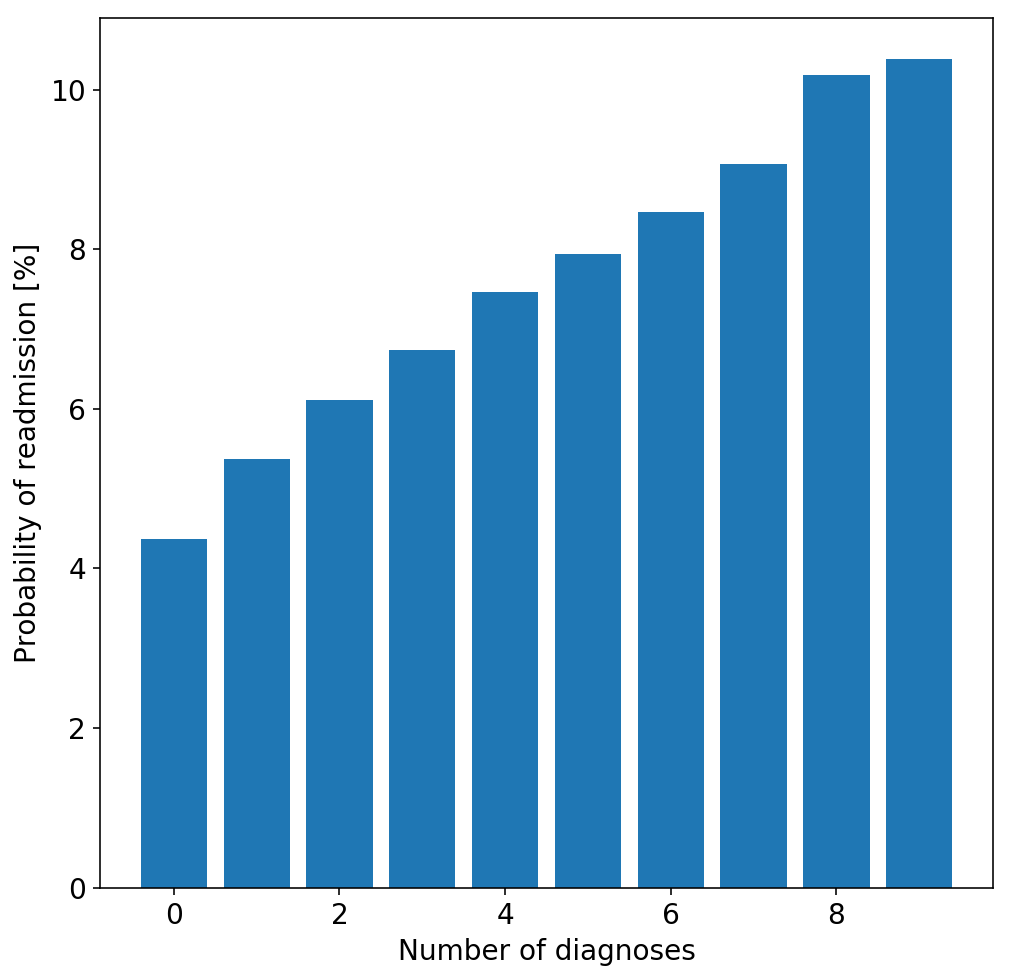

In [396]:
features = [0,1,2,3,4,5,6,7,8,9]
prob = [0]*(len(features))
num_tot_feature = [0]*(len(features))

len(X.index)
average_proba = 0

for b in range(0,len(X.index) -1):
    average_proba += probas[b,1]
    for a in range(0,len(features)):
        if ((X['number_diagnoses'].iloc[b] >= features[a]) and (X['number_diagnoses'].iloc[b] <= (features[a]+1))):
            prob[a] += probas[b,1]
            num_tot_feature[a] += 1
            
pc = []
for a in range(0,len(features)):          
    pc.append(100*prob[a]/num_tot_feature[a])
    
print("The average probability is")    
print(100*average_proba/(len(X.index -1)))
 
plt.bar(features, pc)
plt.legend(loc='best')
plt.xlabel("Number of diagnoses")
plt.ylabel("Probability of readmission [%]")
plt.savefig('prob_number_diagnoses.pdf')

The average probability is
9.09868697833


/Users/violaine/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


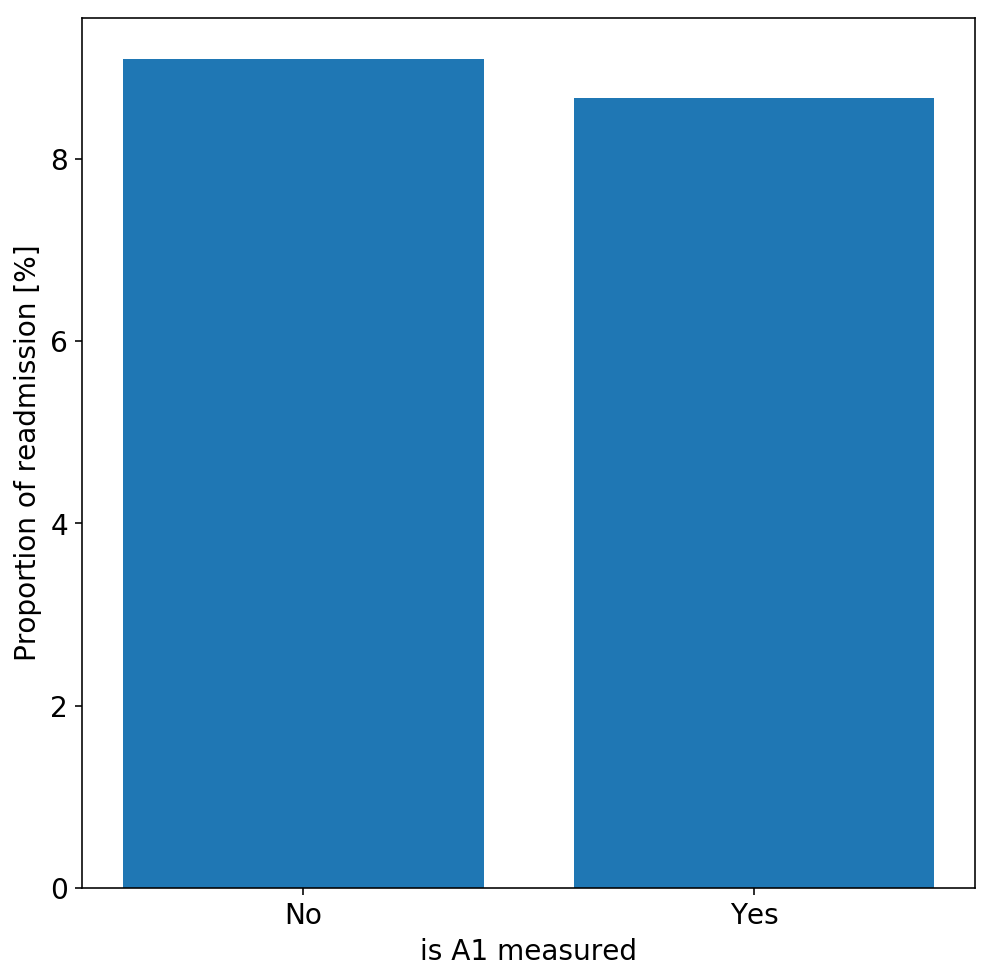

In [398]:
features = [0,1]
prob = [0]*(len(features))
num_tot_feature = [0]*(len(features))

len(X.index)
average_proba = 0

for b in range(0,len(X.index) -1):
    average_proba += probas[b,1]
    for a in range(0,len(features)):
        if ((X['isA1Measured'].iloc[b] >= features[a]) and (X['isA1Measured'].iloc[b] <= (features[a]+1))):
            prob[a] += probas[b,1]
            num_tot_feature[a] += 1
            
pc = []
for a in range(0,len(features)):          
    pc.append(100*prob[a]/num_tot_feature[a])
    
print("The average probability is")    
print(100*average_proba/(len(X.index -1)))

labels = ['No','Yes']

plt.bar(features, pc)
plt.legend(loc='best')
plt.xlabel("is A1 measured")
plt.xticks(features, labels)
plt.ylabel("Proportion of readmission [%]")
plt.savefig('prob_isA1Measured.pdf')

The average probability is
9.09868697833


/Users/violaine/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


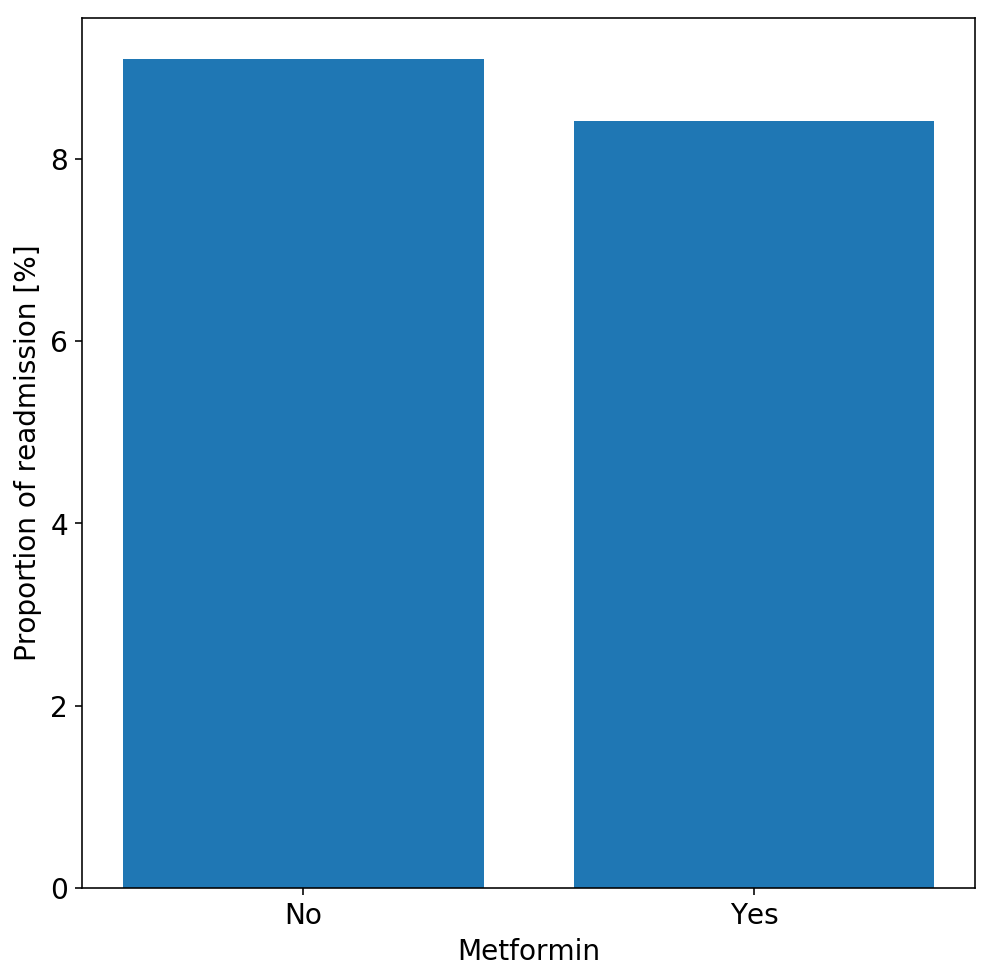

In [397]:
features = [0,1]
prob = [0]*(len(features))
num_tot_feature = [0]*(len(features))

len(X.index)
average_proba = 0

for b in range(0,len(X.index) -1):
    average_proba += probas[b,1]
    for a in range(0,len(features)):
        if ((X['isMetformin'].iloc[b] >= features[a]) and (X['isMetformin'].iloc[b] <= (features[a]+1))):
            prob[a] += probas[b,1]
            num_tot_feature[a] += 1
            
pc = []
for a in range(0,len(features)):          
    pc.append(100*prob[a]/num_tot_feature[a])
    
print("The average probability is")    
print(100*average_proba/(len(X.index -1)))

labels = ['No','Yes']

plt.bar(features, pc)
plt.legend(loc='best')
plt.xlabel("Metformin")
plt.xticks(features, labels)
plt.ylabel("Proportion of readmission [%]")
plt.savefig('prob_isMetformin.pdf')